# Housing prices in munich Date: 2022.01.02
### notebook for saving the data as a csv file and visualization via matplotlib

In [126]:
import csv
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#Url for request
base_url = ""

In [128]:
#example for one offer
res = requests.get(base_url.format(0))
soup = bs4.BeautifulSoup(res.text, "html.parser")
offers = soup.select(".wgg_card.offer_list_item")

In [129]:
offer = offers[0]

In [130]:
offer.select("b")

[<b>2090 €</b>,
 <b>84 m²</b>,
 <b>Große Wohnung für WG-Neugründung</b>,
 <b>2090 € |</b>,
 <b>84 m²</b>,
 <b>
                     Verfügbar:
                     15.03.2022
                 </b>]

In [131]:
offer_data = offer.select("b")[0].text.strip(),offer.select("b")[1].text.strip(),offer.select("b")[2].text.strip()

In [132]:
#now our data has the "price in euro, square meters, title" format
offer_data

('2090 €', '84 m²', 'Große Wohnung für WG-Neugründung')

It's time to gather all the datas in a .csv file
quick note: the format does sometimes change to "title, price in euro, square meters"

In [133]:
app_in_munich = []
for n in range(50):
    try:
        res = requests.get(base_url.format(n))
        soup = bs4.BeautifulSoup(res.text, "html.parser")
        offers = soup.select(".wgg_card.offer_list_item")
        for offer in offers:
            flat = (offer.select("b")[0].text.strip(),offer.select("b")[1].text.strip(),offer.select("b")[2].text.strip())
            app_in_munich.append(flat)
    except:
        continue

In [135]:
#use 'w' for new and 'a' for append data
file_to_output = open('housing_prices_list.csv','w',newline='')
csv_writer = csv.writer(file_to_output,delimiter=',')
csv_writer.writerow(['Price','Squaremeter','Title'])
for app in app_in_munich:
    try:
        if app[1].split()[0].isnumeric():
            csv_writer.writerow([app[0].split()[0],app[1].split()[0],app[2]])
        else:
            csv_writer.writerow([app[2].split()[0],app[0].split()[0],app[1]])
    except:
        continue
file_to_output.close()

Finally the datas are saved and now it's time for the plotting the data

In [136]:
hous = pd.read_csv("housing_prices_list.csv")

In [137]:
hous.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        840 non-null    int64 
 1   Squaremeter  840 non-null    int64 
 2   Title        840 non-null    object
dtypes: int64(2), object(1)
memory usage: 19.8+ KB


In [138]:
hous["price per squaremeter"] = (hous["Price"]/hous["Squaremeter"])

In [139]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  840 non-null    int64  
 1   Squaremeter            840 non-null    int64  
 2   Title                  840 non-null    object 
 3   price per squaremeter  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [149]:
hous_filterd = hous[hous["Price"].apply(lambda price : price > 1) & hous["Price"].apply(lambda price : price < 4000) & hous["Squaremeter"].apply(lambda meter :   10 < meter < 300)]


/var/folders/ts/kk2bkckd2w59jgb92kjsp35m0000gn/T/ipykernel_2528/2521513440.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


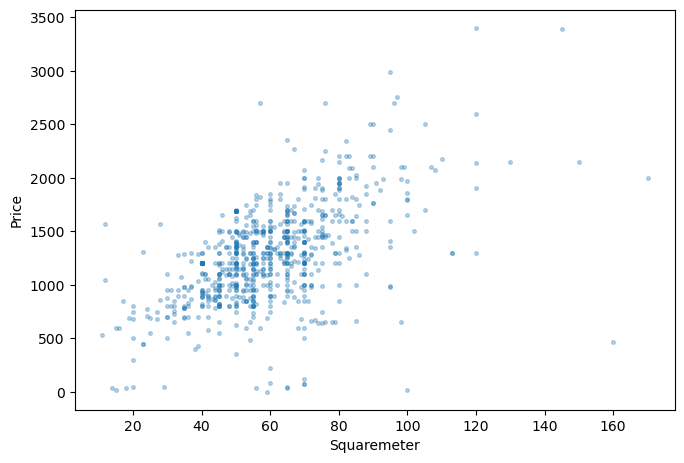

In [162]:
fig = plt.figure(dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Squaremeter')
ax.set_ylabel('Price')
ax.scatter(hous_filterd["Squaremeter"],hous_filterd["Price"], s=7, alpha=0.3)
fig.show()

/var/folders/ts/kk2bkckd2w59jgb92kjsp35m0000gn/T/ipykernel_2528/1579121026.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


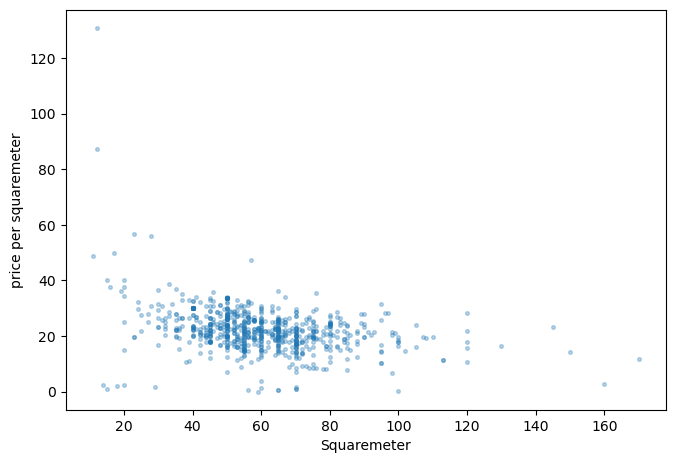

In [163]:
fig = plt.figure(dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Squaremeter')
ax.set_ylabel('price per squaremeter')
ax.scatter(hous_filterd["Squaremeter"],hous_filterd["price per squaremeter"], s=7, alpha=0.3)
fig.show()